In [2]:
import pandas as pd

original_dataset = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [3]:
data = pd.DataFrame(original_dataset)

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


1. What is the distribution of age among heart failure patients in the dataset?

---



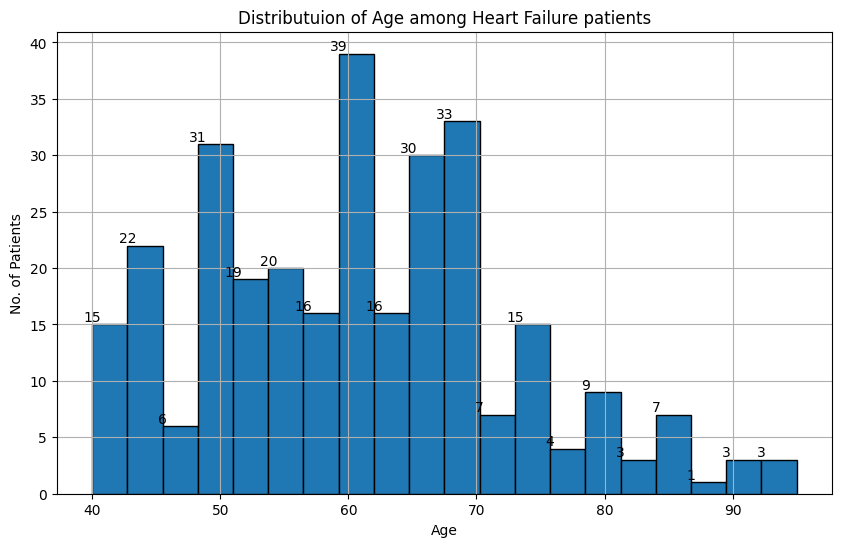

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('No. of Patients')
plt.title('Distributuion of Age among Heart Failure patients')
plt.grid(True)
for count, x in zip(n, bins):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')
plt.show()

2. How does the death rate vary with age?

---



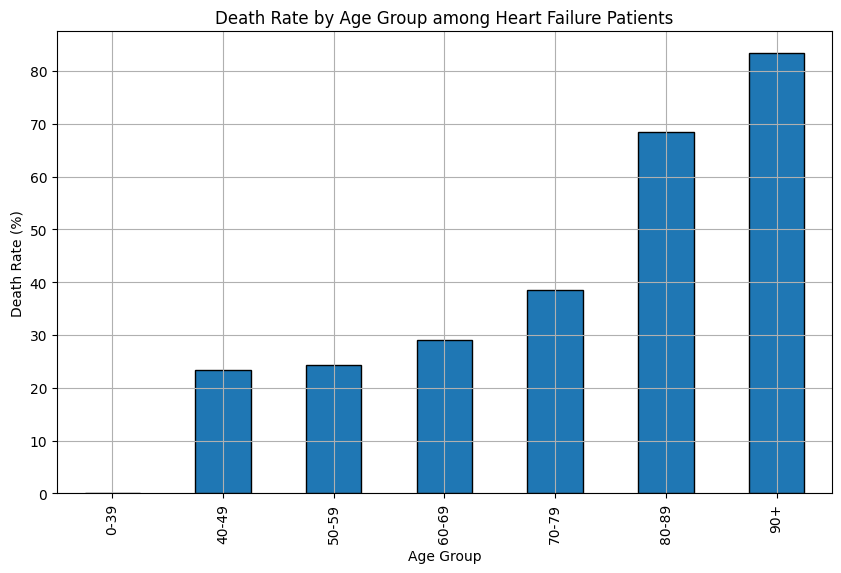

In [5]:
bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
age_groups = pd.cut(data['age'], bins=bins, labels=labels, right=False)
death_rate_by_age = data.groupby(age_groups)["DEATH_EVENT"].mean() * 100
plt.figure(figsize=(10,6))
death_rate_by_age.plot(kind='bar', edgecolor='black')
plt.title('Death Rate by Age Group among Heart Failure Patients')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.grid(True)
plt.show()

3. What is the percentage of male and female patients in the dataset?

---



In [6]:
#Total % of male and female patients in the dataset

print("Count of Male & Female patients in dataset :")
sex_count = data["sex"].value_counts()
sex_count.index = ["Male", "Female"]
print(sex_count)
print()
print("Percentage of Male & Female patients in dataset :")
sex_count_percentage = data["sex"].value_counts(normalize=True) * 100
sex_count_percentage.index = ["Male", "Female"]
print(sex_count_percentage)

Count of Male & Female patients in dataset :
Male      194
Female    105
Name: count, dtype: int64

Percentage of Male & Female patients in dataset :
Male      64.882943
Female    35.117057
Name: proportion, dtype: float64


In [7]:
#Percentage of male and female patients who died due to heart failure

print("Death count of Male & Female patients due to heart failure :")
death_count_by_sex = data[data["DEATH_EVENT"] == 1]["sex"].value_counts()
death_count_by_sex.index = ["Male", "Female"]
print(death_count_by_sex)
print()
print("Death percentage of Male & Female patients due to heart failure :")
death_percentage_by_sex = data[data["DEATH_EVENT"] == 1]["sex"].value_counts(normalize=True) * 100
death_percentage_by_sex.index = ["Male", "Female"]
print(death_percentage_by_sex)

Death count of Male & Female patients due to heart failure :
Male      62
Female    34
Name: count, dtype: int64

Death percentage of Male & Female patients due to heart failure :
Male      64.583333
Female    35.416667
Name: proportion, dtype: float64


4. How does the platelet count vary among different age groups?

---



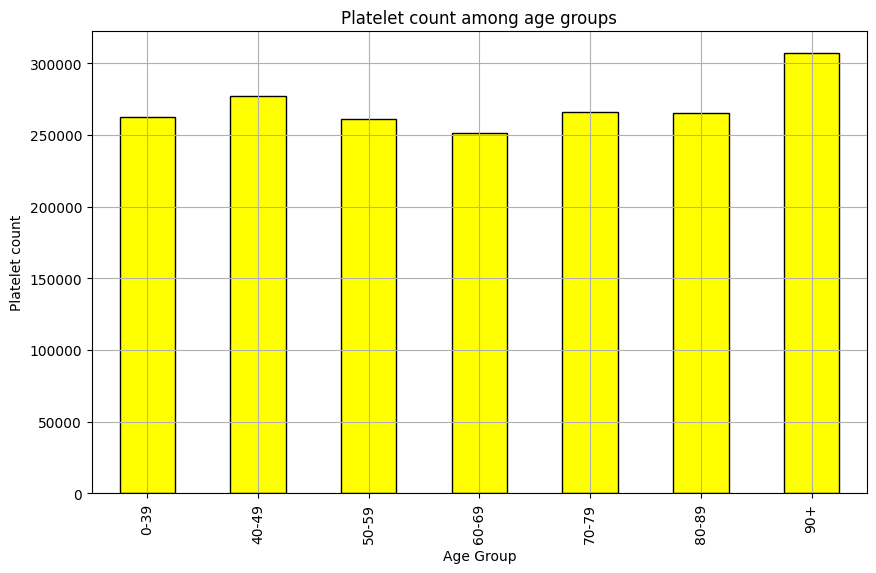

In [8]:
bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
age_groups = pd.cut(data["age"], bins=bins, labels=labels)
platelet_count_by_age_groups = data.groupby(age_groups)["platelets"].mean()

plt.figure(figsize=(10,6))
platelet_count_by_age_groups.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Platelet count among age groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet count')
plt.grid(True)

plt.show()

5. Is there a correlation between creatinine and sodium levels in the blood?

---



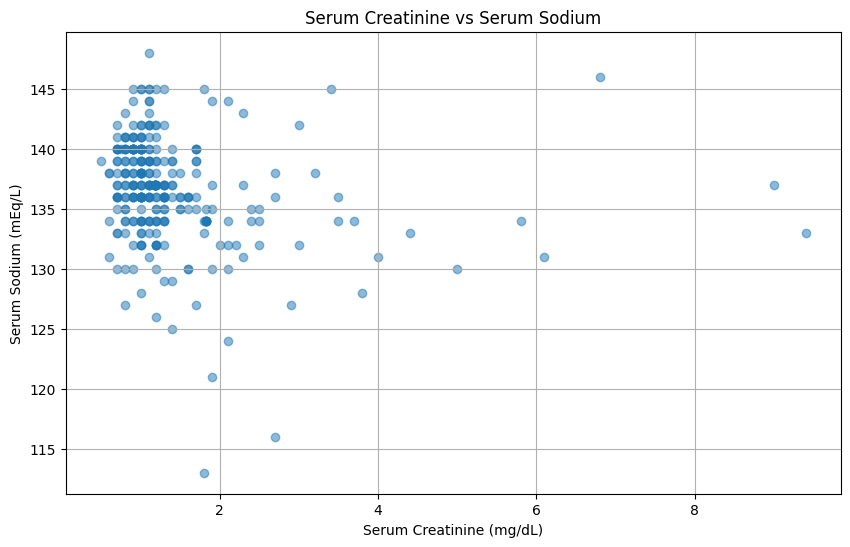

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data["serum_creatinine"], data["serum_sodium"], alpha=0.5)
plt.title("Serum Creatinine vs Serum Sodium")
plt.xlabel("Serum Creatinine (mg/dL)")
plt.ylabel("Serum Sodium (mEq/L)")
plt.grid(True)
plt.show()

6. How does the prevalence of high blood pressure differ between male and female patients?

---



In [10]:
high_BP_prevalance = data.groupby("sex")["high_blood_pressure"].mean() * 100
high_BP_prevalance.index = ["Female", "Male"]

print("Mean percentage of male and female having high BP :")
print(high_BP_prevalance)

Mean percentage of male and female having high BP :
Female    41.904762
Male      31.443299
Name: high_blood_pressure, dtype: float64


7. What is the relationship between smoking habits and the occurrence of heart failure?

---



In [11]:
smoking_and_heart_failure = data.groupby("smoking")["DEATH_EVENT"].mean() * 100
smoking_and_heart_failure.index = ["Non-Smoker", "Smoker"]

print("Mean death percentage of Smokers and Non-smokers :")
print(smoking_and_heart_failure)

Mean death percentage of Smokers and Non-smokers :
Non-Smoker    32.512315
Smoker        31.250000
Name: DEATH_EVENT, dtype: float64


8. Are there any noticeable patterns in the distribution of death events across different age groups?

---



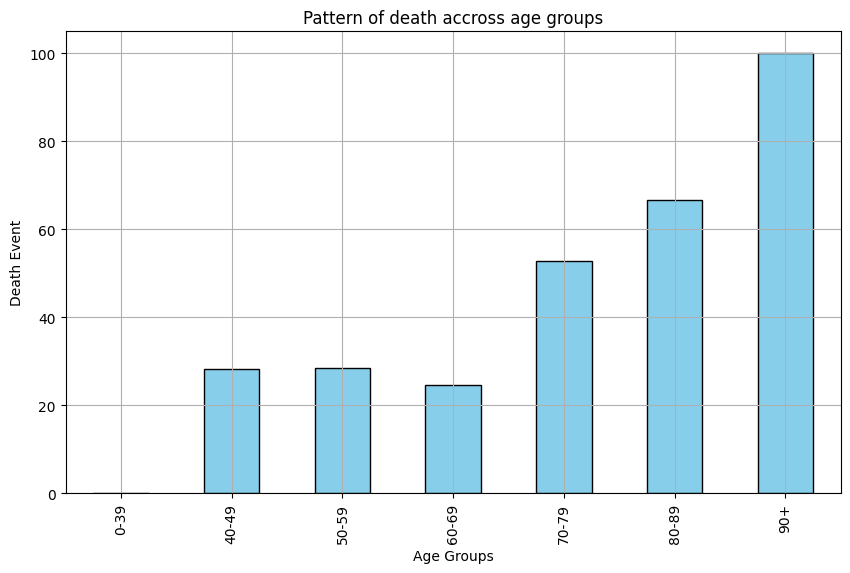

In [12]:
bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
data["age_groups"] = pd.cut(data["age"], bins=bins, labels=labels)
death_event_by_age_group = data.groupby("age_groups")["DEATH_EVENT"].mean() * 100
death_count_by_age_group = data.groupby("age_groups")["DEATH_EVENT"].sum()

plt.figure(figsize=(10,6))
death_event_by_age_group.plot(kind = "bar", color = "skyblue", edgecolor = "black")
plt.title("Pattern of death accross age groups")
plt.xlabel("Age Groups")
plt.ylabel("Death Event")
plt.grid(True)
plt.show()

9. Is there any significant difference in ejection fraction between patients with and without diabetes?

---



In [13]:
from scipy.stats import ttest_ind

diabetic_group = data[data["diabetes"] == 1]["ejection_fraction"]
non_diabetic_group = data[data["diabetes"] == 0]["ejection_fraction"]

t_stat, p_value = ttest_ind(diabetic_group, non_diabetic_group)

print(f"T-statistics : {t_stat}")
print(f"P-value : {p_value}")

alpha = 0.05
if p_value < alpha :
  print("There is a significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no significant difference in ejection fraction between patients with and without diabetes.")

T-statistics : -0.08358970647234736
P-value : 0.9334389630426103
There is no significant difference in ejection fraction between patients with and without diabetes.


10. How does the serum creatinine level vary between patients who survived and those who did not?

---



Survived - Mean Serum Creatinine: 1.84, Standard Deviation: 1.47
Not Survived - Mean Serum Creatinine: 1.84, Standard Deviation: 1.47


<Figure size 1000x600 with 0 Axes>

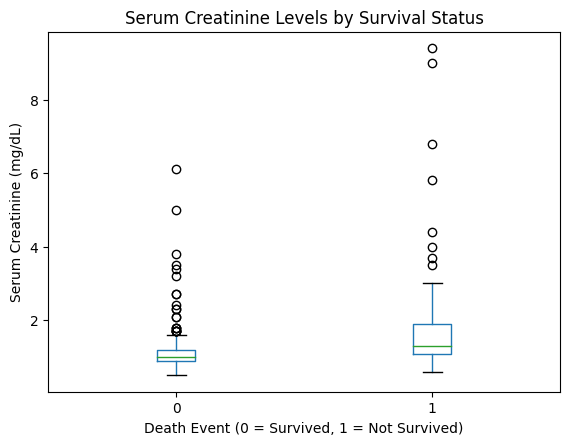

In [14]:
survived_group = data[data["DEATH_EVENT"] == 1]["serum_creatinine"]
not_survived_group = data[data['DEATH_EVENT'] == 1]['serum_creatinine']

survived_mean = survived_group.mean()
survived_std = survived_group.std()
not_survived_mean = not_survived_group.mean()
not_survived_std = not_survived_group.std()

print(f'Survived - Mean Serum Creatinine: {survived_mean:.2f}, Standard Deviation: {survived_std:.2f}')
print(f'Not Survived - Mean Serum Creatinine: {not_survived_mean:.2f}, Standard Deviation: {not_survived_std:.2f}')


plt.figure(figsize=(10, 6))
data.boxplot(column='serum_creatinine', by='DEATH_EVENT', grid=False)
plt.title('Serum Creatinine Levels by Survival Status')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by DEATH_EVENT' title
plt.xlabel('Death Event (0 = Survived, 1 = Not Survived)')
plt.ylabel('Serum Creatinine (mg/dL)')
plt.show()